 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import plotly.graph_objects as go

# import hvplot.pandas

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
csvpath = Path("Resources/whale_returns.csv")
wrdata = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
wrdata.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# rename columns
wrdata.columns = ['SOROS', 'PAULSON', 'TIGER', 'BERKSHIRE']
wrdata.head()

,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
nullct = wrdata.size - wrdata.dropna().size
print(f"{nullct}")

4


In [5]:
# Drop nulls
wrdata = wrdata.dropna()
wrdata.head()

,SOROS,PAULSON,TIGER,BERKSHIRE
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
csvpath = Path("Resources/algo_returns.csv")
algodata = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
algodata.head(20)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
print(f"{algodata.size - algodata.dropna().size}")

12


In [8]:
# Drop nulls
algodata = algodata.dropna()
algodata.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [29]:
# Reading S&P TSX 60 Closing Prices
csvpath = Path("Resources/sp_tsx_history.csv")
tsxdata = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
tsxdata.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
tsxdata.dtypes

Close    object
dtype: object

In [30]:
# Fix Data Types
tsxdata['Close'] = pd.to_numeric(tsxdata['Close'].replace('[\$,]', '', regex=True))

tsxdata.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [12]:
tsxdata.tail()

,Close
Date,
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15
2019-12-27,17168.21
2019-12-30,17098.56


In [32]:
# Calculate Daily Returns
# Rename `Close` Column to be specific to this portfolio.
# Drop nulls

tsxdata['TSX'] = tsxdata['Close'].pct_change()
tsx_returns = tsxdata.dropna().drop(columns=["Close"])
tsx_returns.head()

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([wrdata, algodata, tsx_returns], axis="columns").dropna()


In [35]:
daily_returns.tail()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
Date,,,,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570,-0.001183
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358,-0.004703


In [36]:
# how to select data from dataframe
# iloc loc
# without iloc or loc
daily_returns

# iloc INDEX locator
# loc NAME locator
# df.iloc[row,col]
# daily_returns.iloc[0:6] # by index
daily_returns.loc["2015-03-03":"2015-03-09"]

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [37]:
daily_returns = daily_returns.dropna()
daily_returns.head()

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

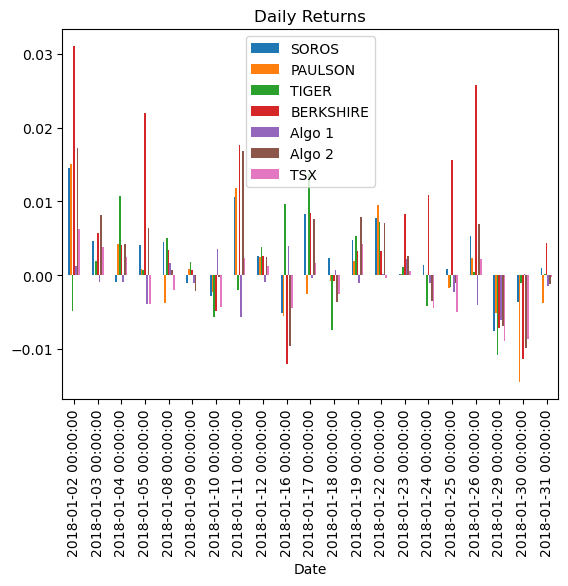

In [38]:
# Plot daily returns of all portfolios
subset = daily_returns.loc["2018-01-01":"2018-01-31"]
subset.plot(kind="bar", title="Daily Returns")

#### Calculate and Plot cumulative returns.

In [41]:
cumulative = (1 + daily_returns).cumprod()
cumulative

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<Axes: xlabel='Date'>

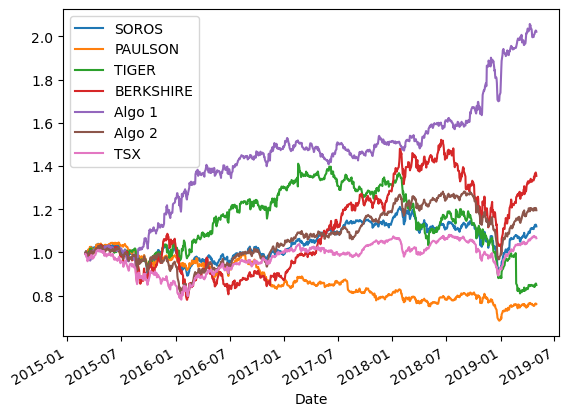

In [42]:
# Plot cumulative returns
cumulative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

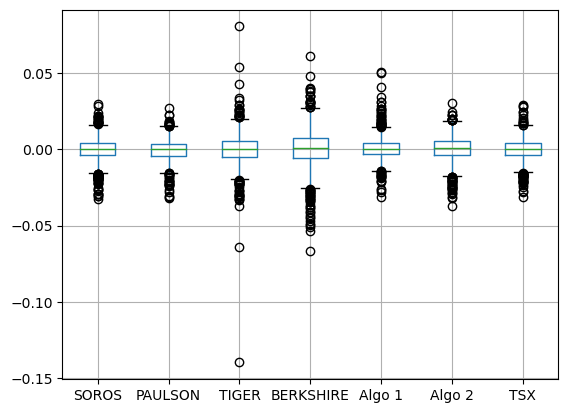

In [46]:



# Box plot to visually show risk
daily_returns.boxplot()


### Calculate Standard Deviations

<Axes: >

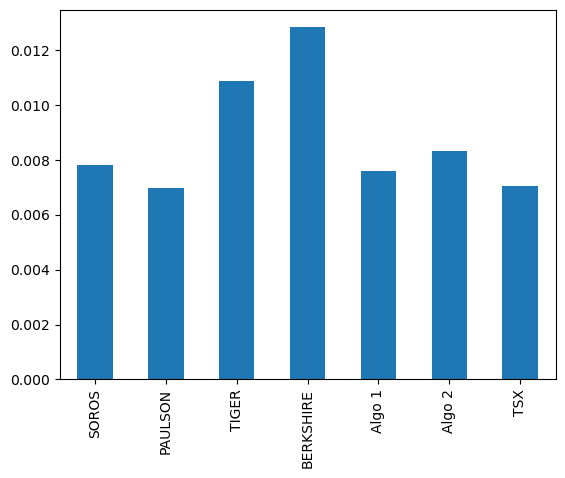

In [82]:
# Calculate the daily standard deviations of all portfolios
std_devs = daily_returns.std()
std_devs.plot(kind="bar")

### Determine which portfolios are riskier than the S&P TSX 60

In [95]:
# Calculate  the daily standard deviation of S&P TSX 60
# Determine which portfolios are riskier than the S&P TSX 60
# Calculate the daily standard deviation of S&P TSX 60
stddevs = daily_returns.std()
print(stddevs)

tsx_std = daily_returns['TSX'].std()

name = ''
value = tsx_std

for name, value in stddevs.items():
    if value > tsx_std:
        print(f"{name} is riskier than TSX with std={value}")


SOROS        0.007828
PAULSON      0.006982
TIGER        0.010883
BERKSHIRE    0.012826
Algo 1       0.007589
Algo 2       0.008326
TSX          0.007034
dtype: float64
SOROS is riskier than TSX with std=0.007827576541233951
TIGER is riskier than TSX with std=0.010882785735819496
BERKSHIRE is riskier than TSX with std=0.012825516031663223
Algo 1 is riskier than TSX with std=0.007588882996571315
Algo 2 is riskier than TSX with std=0.008326359992689701


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [61]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = daily_returns.rolling(window=21).std()
print(rolling)


               SOROS   PAULSON     TIGER  BERKSHIRE    Algo 1    Algo 2  \
Date                                                                      
2015-03-03       NaN       NaN       NaN        NaN       NaN       NaN   
2015-03-04       NaN       NaN       NaN        NaN       NaN       NaN   
2015-03-05       NaN       NaN       NaN        NaN       NaN       NaN   
2015-03-06       NaN       NaN       NaN        NaN       NaN       NaN   
2015-03-09       NaN       NaN       NaN        NaN       NaN       NaN   
...              ...       ...       ...        ...       ...       ...   
2019-04-25  0.004145  0.005572  0.004917   0.006641  0.005801  0.005764   
2019-04-26  0.004117  0.005649  0.005424   0.006599  0.005562  0.005700   
2019-04-29  0.004123  0.005374  0.005438   0.006584  0.005251  0.005622   
2019-04-30  0.004199  0.005408  0.005419   0.006323  0.005294  0.005600   
2019-05-01  0.004271  0.005009  0.005744   0.006143  0.004972  0.005686   

                 TSX  
D

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [71]:
# Calculate covariance of a single portfolio
soros_tsx_covariance = daily_returns['SOROS'].rolling(window=30).cov(daily_returns['TSX'])
# Calculate variance of S&P TSX

tsx_variance = daily_returns['TSX'].rolling(window=30).var()




<Axes: xlabel='Date'>

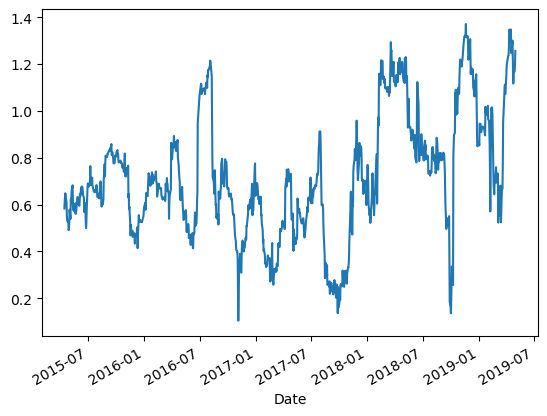

In [70]:
# Plot beta trend
# Computing beta

beta = soros_tsx_covariance / tsx_variance
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: xlabel='Date'>

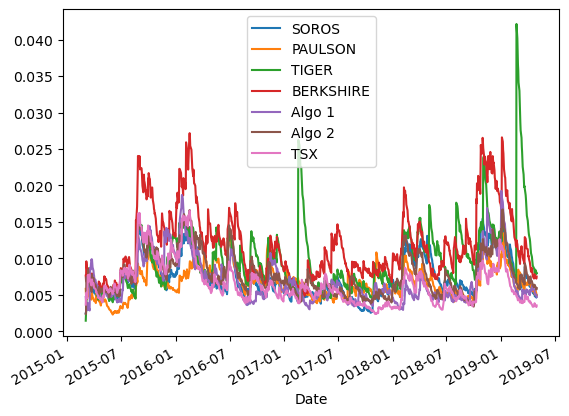

In [80]:
# Use `ewm` to calculate the rolling window
ewm21 = daily_returns.ewm(span=21).std()
ewm21.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!